<a href="https://colab.research.google.com/github/18Srikar/dm_finalproject_co2/blob/main/Copy_of_dm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls '/content/drive/MyDrive/'

 21-24.csv
'CO2_ Emissions_Canada.csv'
'Colab Notebooks'/
'Copy of Eden Written Test.docx'
'CSE340F24_HW3 (1).gdoc'
 CV.pdf
 description.gdoc
'Final Individual Report_Sunil_Vejendla.gdoc'
'Final Video.mkv'
 Graduates.gsite
'HW 3 solutions.gdoc'
'HW 4 solutions.gdoc'
'Jahnavi_kolli_Individual_progress_report_week3 .docx'
'peer_evaluation (1).gdoc'
 peer_evaluation.gdoc
'Report (1).gdoc'
 Report.gdoc
'Sunil_Individual_Progress_Report (1).docx'
 Sunil_Individual_Progress_Report.docx
 Sunil_Individual_Progress_Report_Week_2.docx
 Sunil_Individual_Progress_week2_Report.docx
 Sunil_Vejendla_Individual_In-depth_Report_2.docx
 Sunil_Vejendla_Individual_In-depth_Report.docx
 Sunil_Vejendla_Individual_Progress_Report_Week_3.docx
 Sunil_Vejendla_Individual_Progress_Report_Week_7.docx
 Sunil_Vejendla_Individual_Progress_Report_Week_8.docx
 Sunil_Vejendla_Individual_Progress_Report_Week_9.docx
 template/
'Video end.mkv'


In [ ]:
co2 = pd.read_csv('/content/drive/MyDrive/CO2_ Emissions_Canada.csv')
# co2 = pd.read_csv('/content/CO2 Emissions_Canada.csv')
co2.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
co2.shape

(7385, 12)

In [ ]:
co2.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


So the dataset has 12 columns, 7385 rows and has no missing values.

CO2 Emissions is the target variable.

In [ ]:
co2.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


We have two columns of the same data with different units. Could drop one(?)

Safe to assume that Hwy fuel consumption is lower than City always.

Combined fuel consumption assumes 55% city and 45 % highway. True for all types of cars? Maybe some cars travel more in city?


In [ ]:
# Duplicated data
co2_duplicated=co2[co2.duplicated() == True]
co2_duplicated

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [ ]:
# We have some duplicated data.
sum(co2_duplicated.groupby(by =['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'])['Fuel Consumption City (L/100 km)'].nunique())


979

In [ ]:
# drop all duplicate data

co2.drop_duplicates(keep='first', inplace=True)

In [ ]:
co2.shape

(6282, 12)

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
unique_counts=co2.nunique()
print(unique_counts)

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64


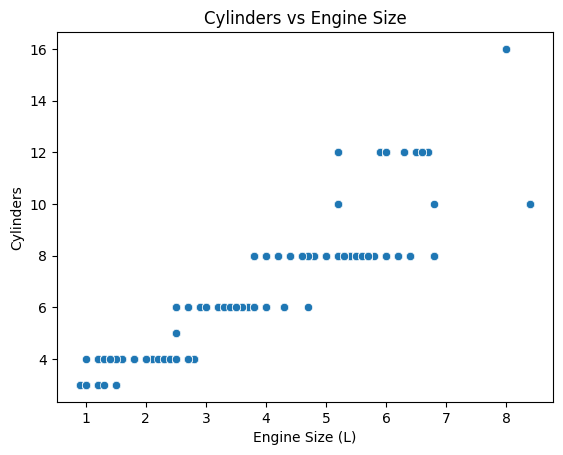

In [ ]:
sns.scatterplot(data=co2, x="Engine Size(L)", y="Cylinders")

plt.title('Cylinders vs Engine Size', loc='center')
plt.xlabel('Engine Size (L)')
plt.ylabel('Cylinders')

plt.show()

*   We need to create range for make(Year wise). *How? there are no years in the dataset*
*   Engine size and cylinders are dependent. *Can be combined?*
*   Too many unique values in transmission, will narrow it down



<Figure size 800x600 with 0 Axes>

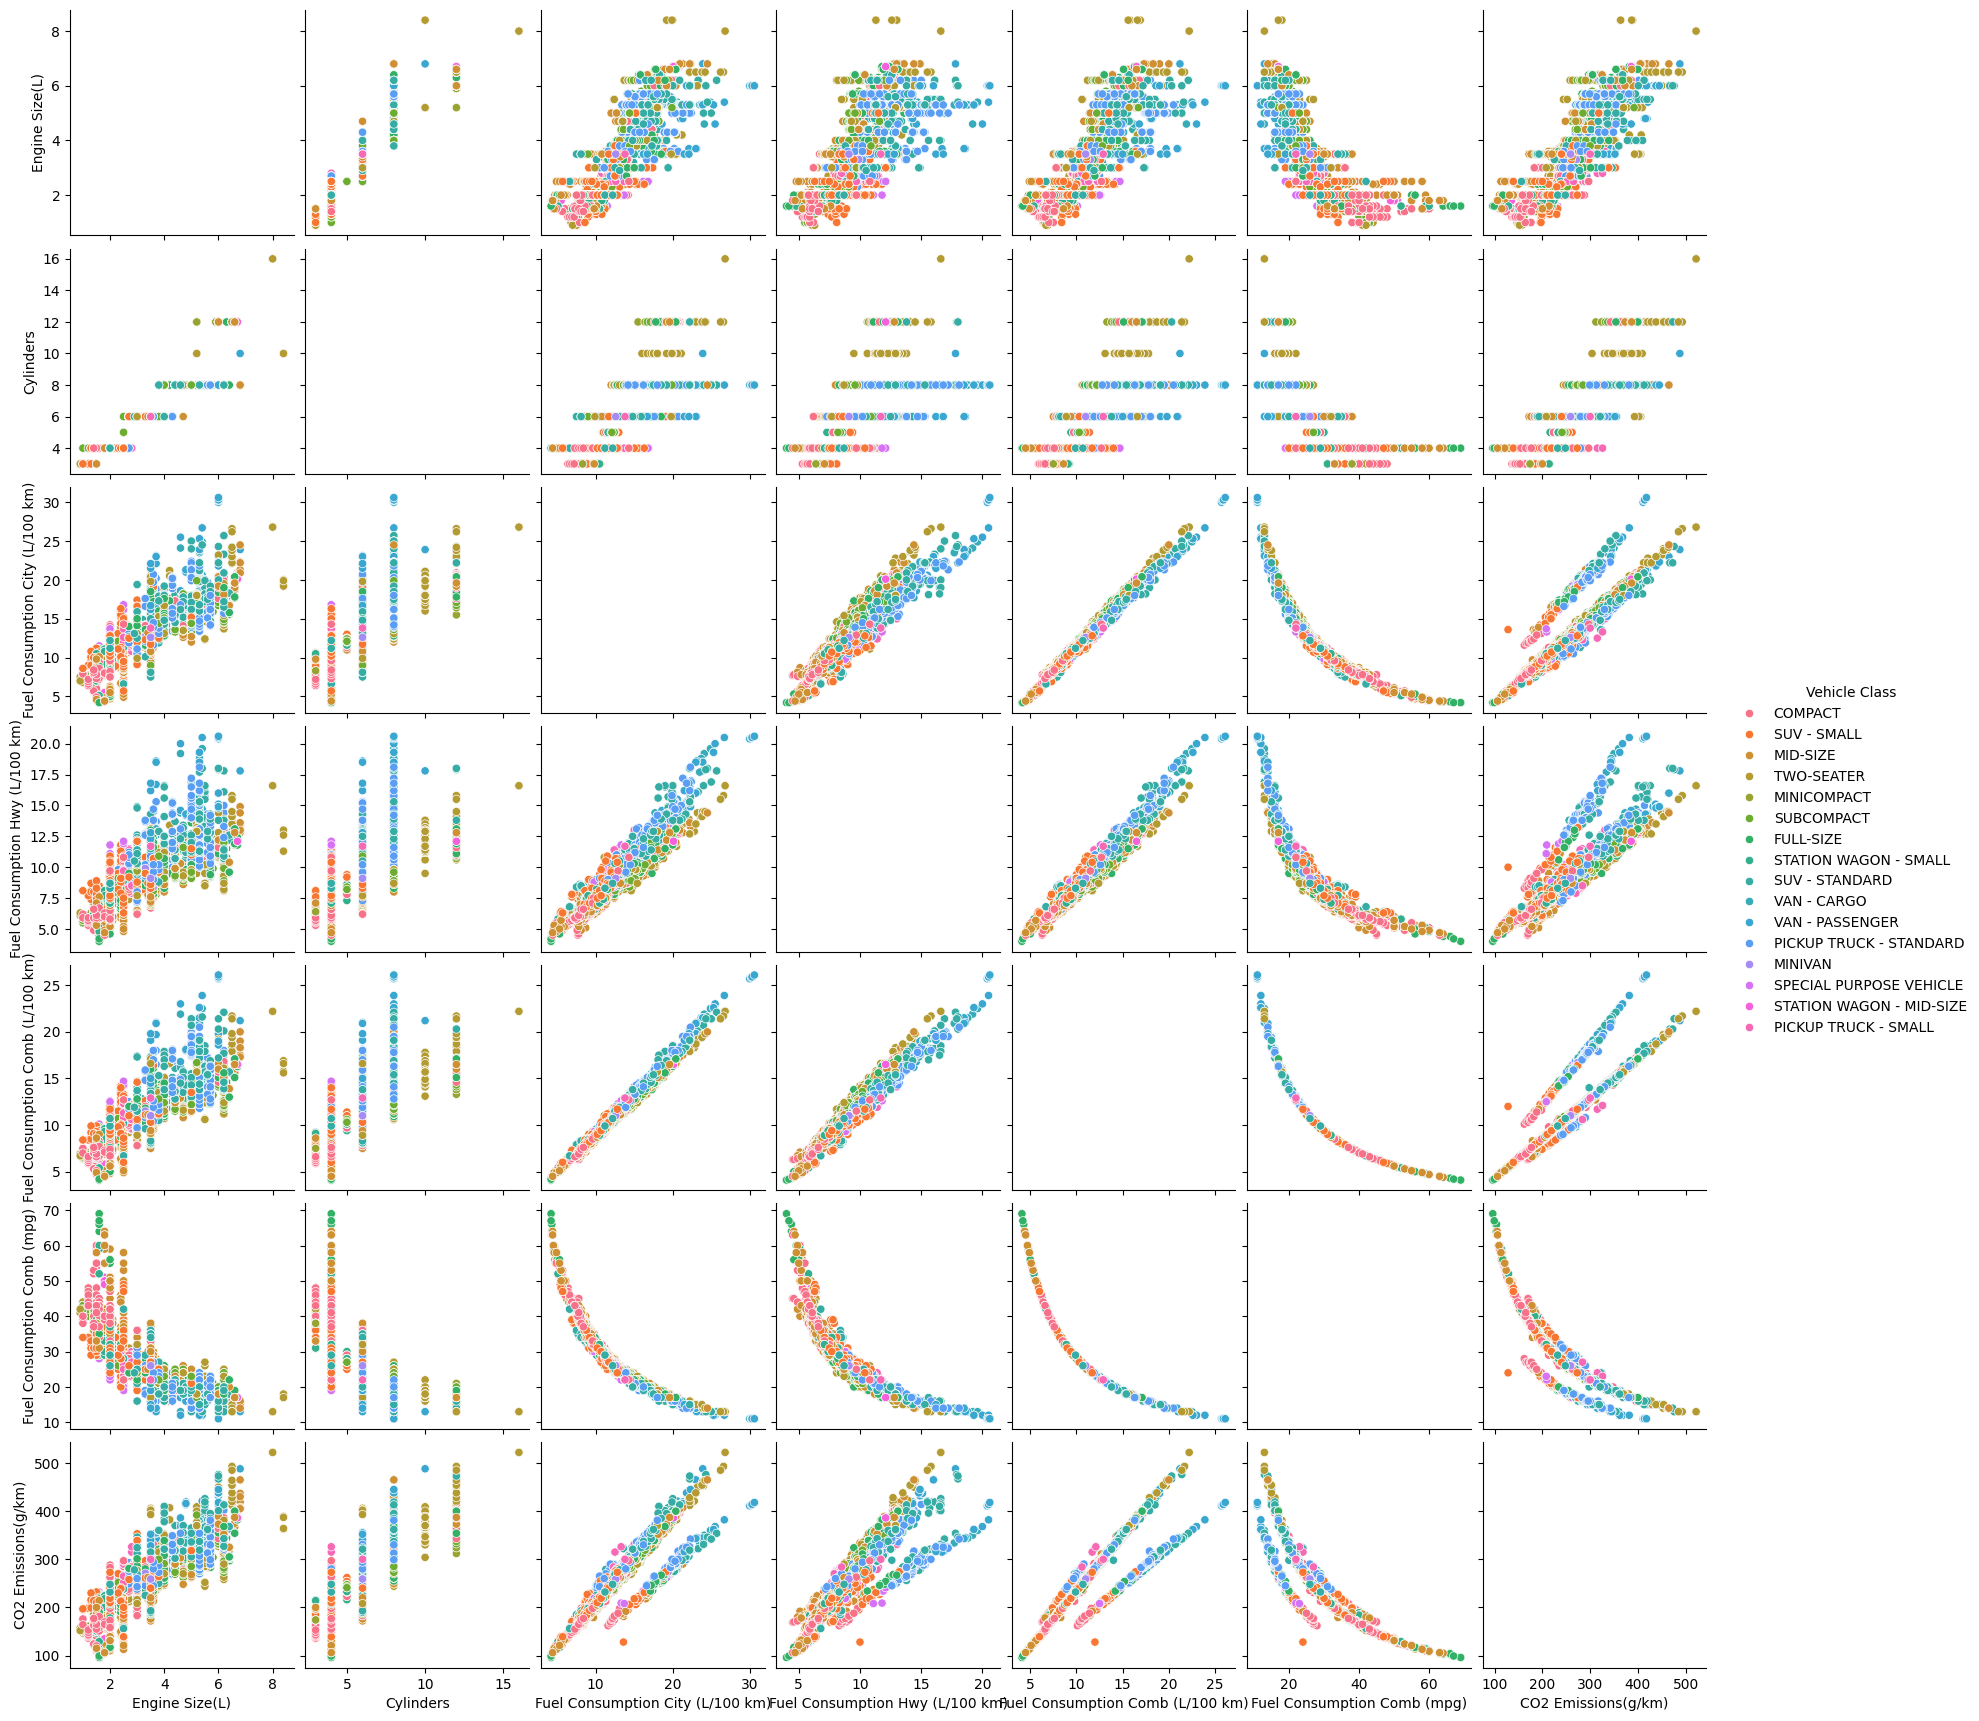

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(co2, hue='Vehicle Class', diag_kind={'kde':{'bw':1}})

As engine size increases:

fuel consumption (L/100km) increases linearly.

the number of cylinders increases linearly.

CO2 emissions increases linearly.

As cylinders increases:

engine size increases linearly

the number of cylinders increases linearly

CO2 emissions increases linearly

As fuel consumption increases:

engine size increases linearly

cylinders increase linearly

fuel mileage decreases asymtotically --> inverse relationship

As CO2 emissions increases:

engine size increases linearly

cylinders increase linearly

fuel consumption (L/100km) increases linearly, but along bands or distinct slopes. This is most visible on the combined fuel consumption (city/hwy).

<Figure size 1000x600 with 0 Axes>

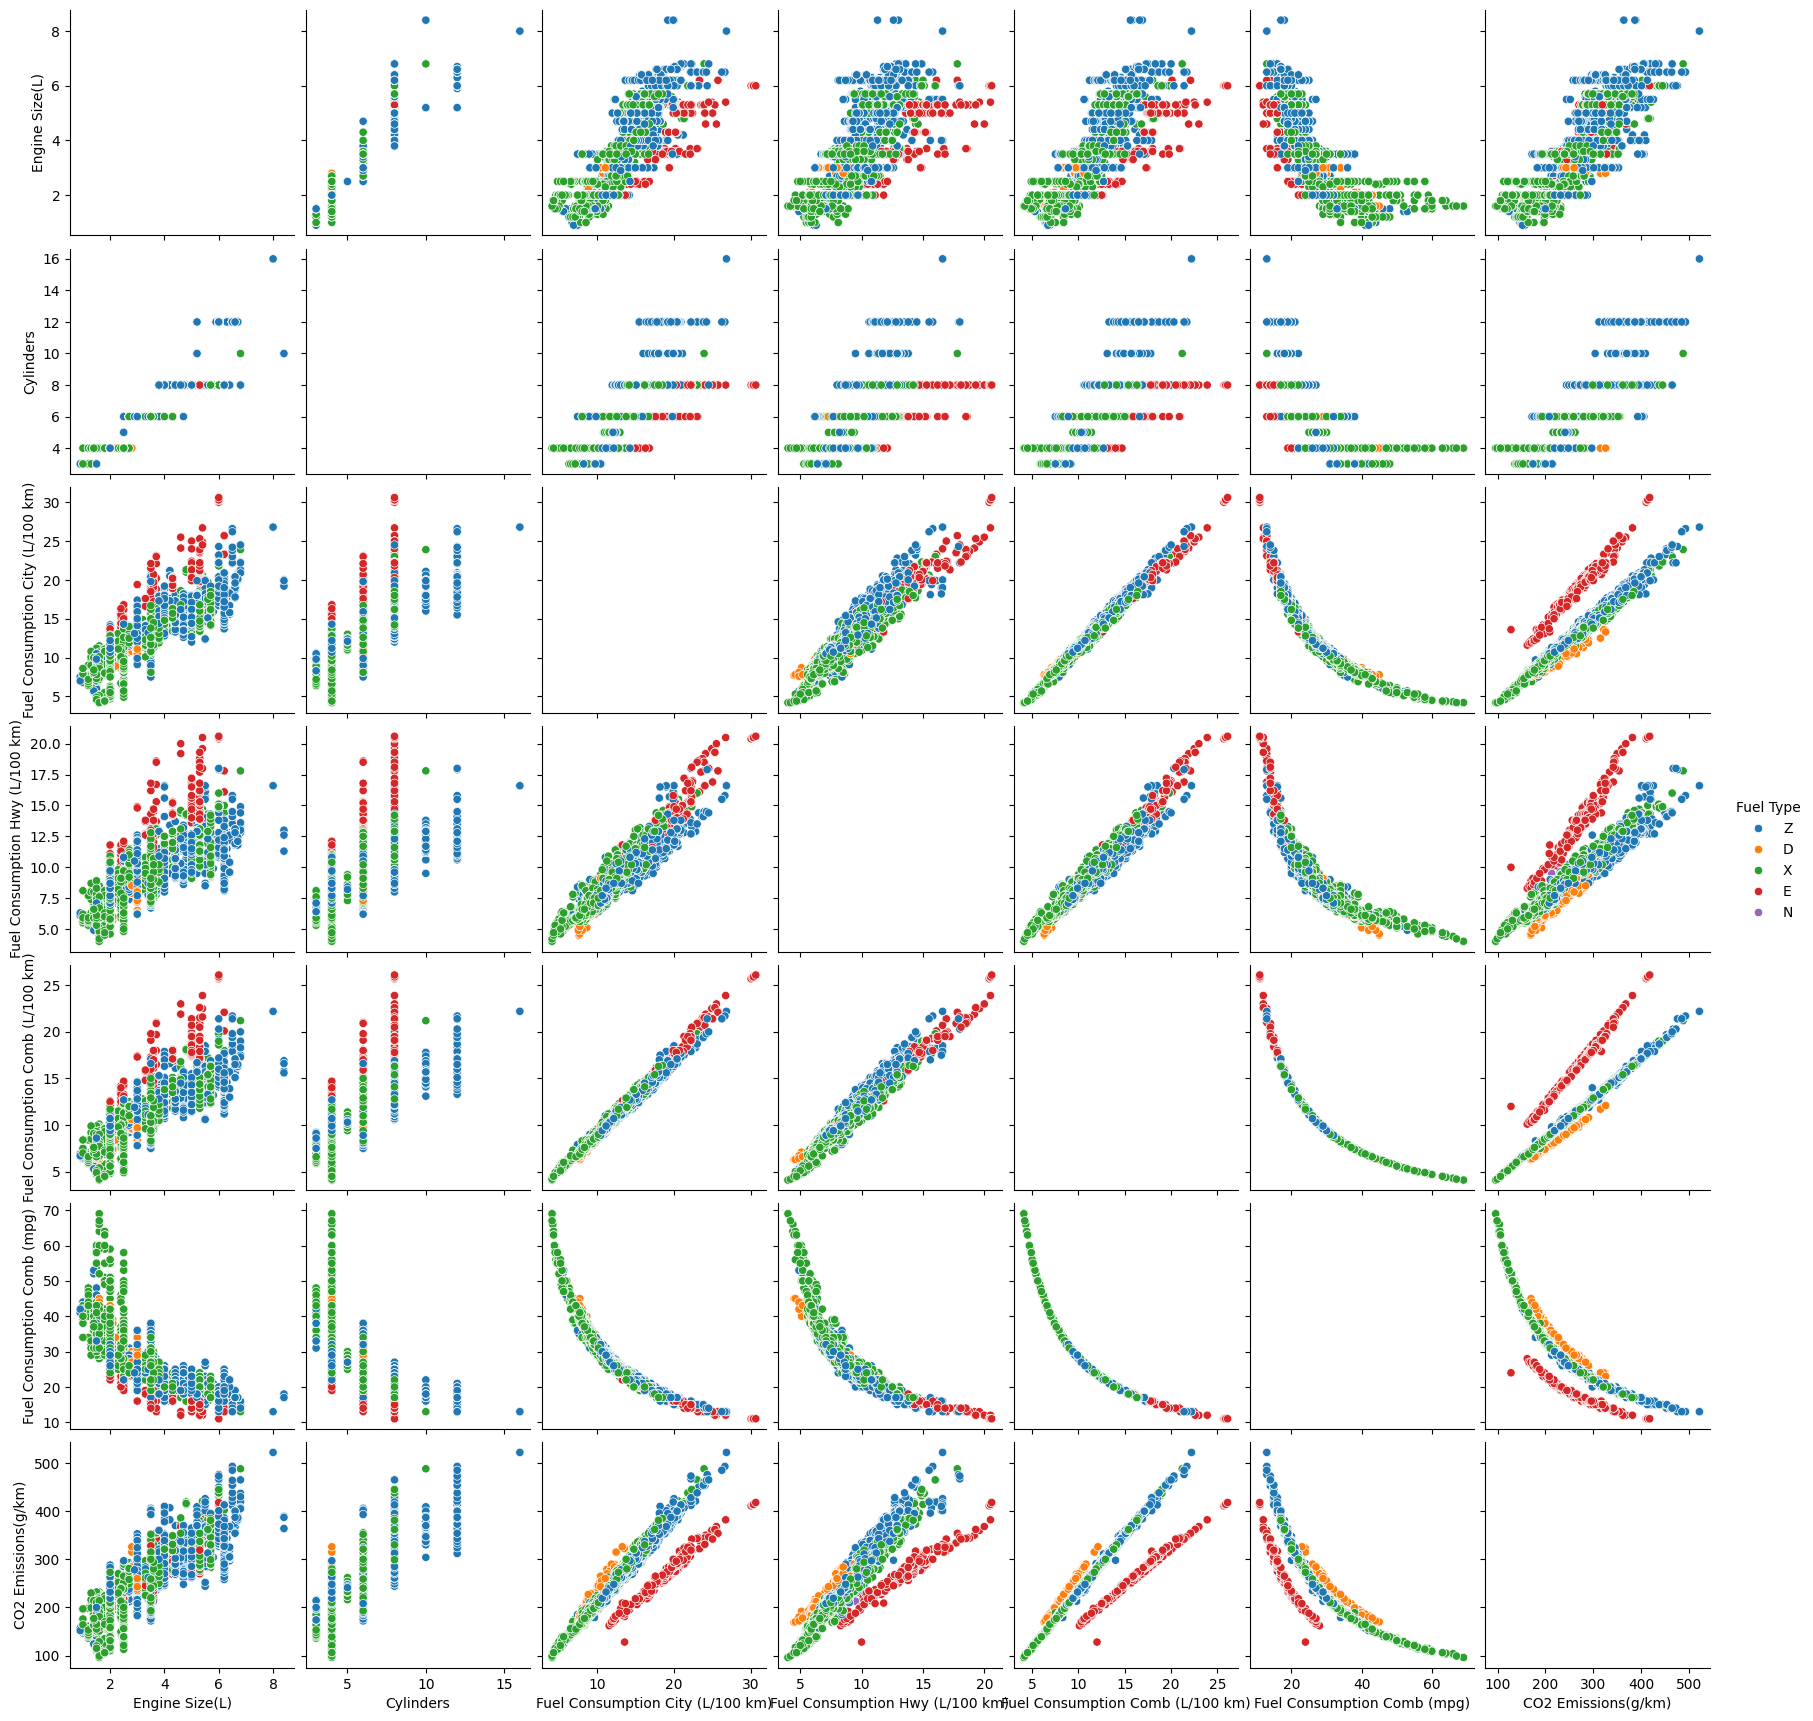

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(co2, hue='Fuel Type', diag_kind={'kde':{'bw':1}})

Ethanol vehicles have the worst fuel consumption (L/100km) for the same sized engine.

Ethanol vehicles have the least CO2 emissions for a given fuel consumption (L/100km).

Diesel vehicles have the most CO2 emissions for a given fuel consumptions (L/100km).

Premium gasoline tends to be on the upper end on engine size, number of cylinders, fuel consumption, and CO2 emissions.

Most vehicles use gasoline or premium gasoline.

In [ ]:
for column in co2.columns:
    unique_values = co2[column].value_counts().reset_index()
    unique_values.columns = [column, 'Count']
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'Make':
             Make  Count
0            FORD    577
1       CHEVROLET    515
2             BMW    501
3   MERCEDES-BENZ    365
4         PORSCHE    296
5             GMC    289
6          TOYOTA    276
7            AUDI    263
8          NISSAN    213
9            MINI    200
10           JEEP    200
11            KIA    192
12     VOLKSWAGEN    187
13        HYUNDAI    184
14          DODGE    180
15          HONDA    164
16       CADILLAC    141
17          LEXUS    129
18          MAZDA    127
19         SUBARU    119
20         JAGUAR    118
21          VOLVO    118
22          BUICK     92
23       INFINITI     87
24        LINCOLN     81
25     LAND ROVER     76
26     MITSUBISHI     73
27            RAM     72
28       CHRYSLER     64
29           FIAT     56
30       MASERATI     52
31          ACURA     51
32    ROLLS-ROYCE     48
33   ASTON MARTIN     39
34    LAMBORGHINI     37
35        BENTLEY     35
36          SCION     21
37     ALFA ROMEO     19

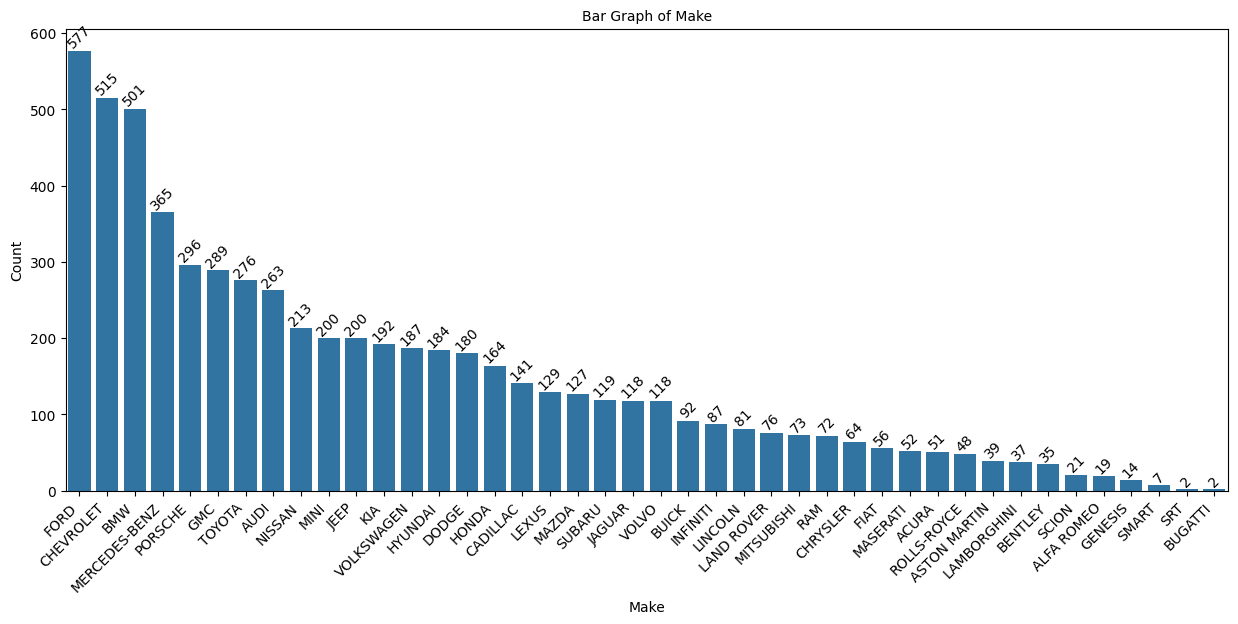

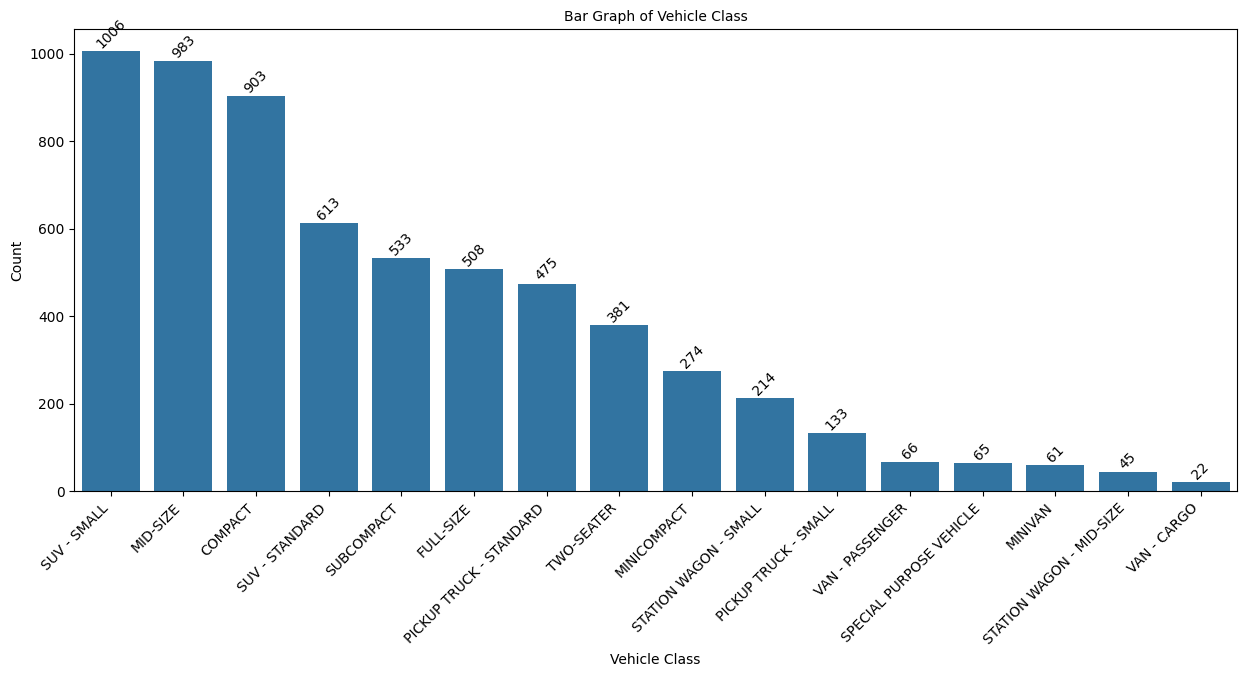

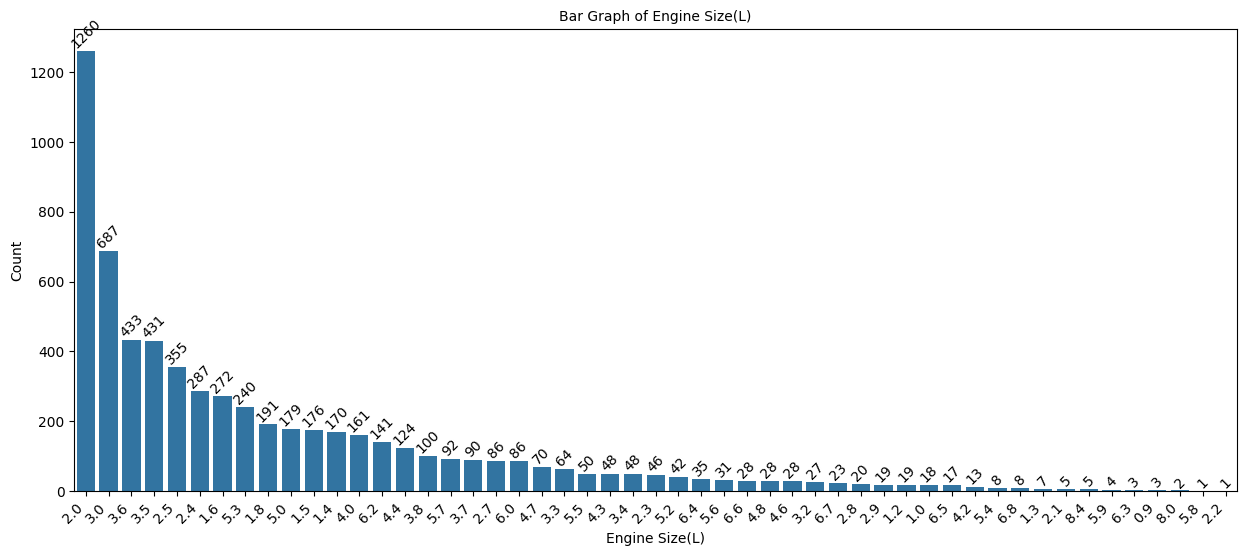

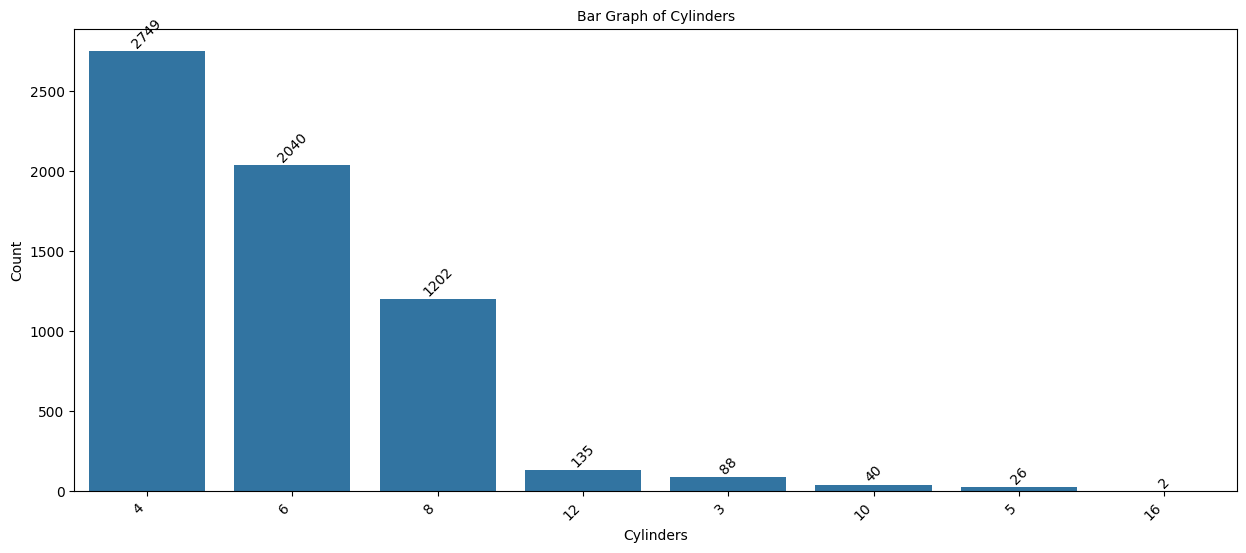

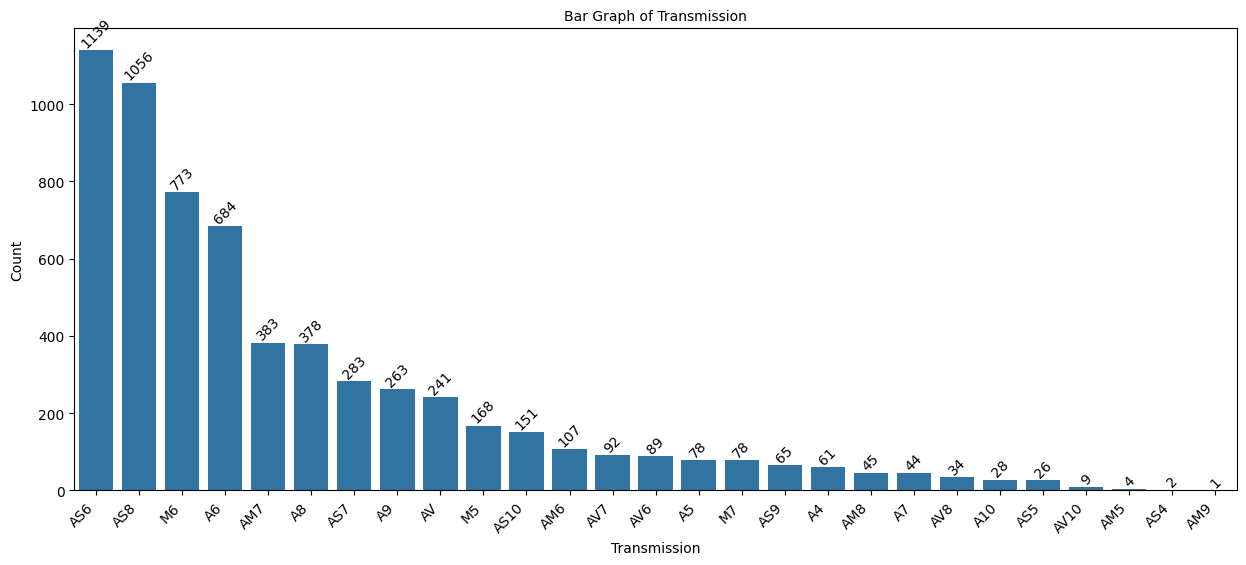

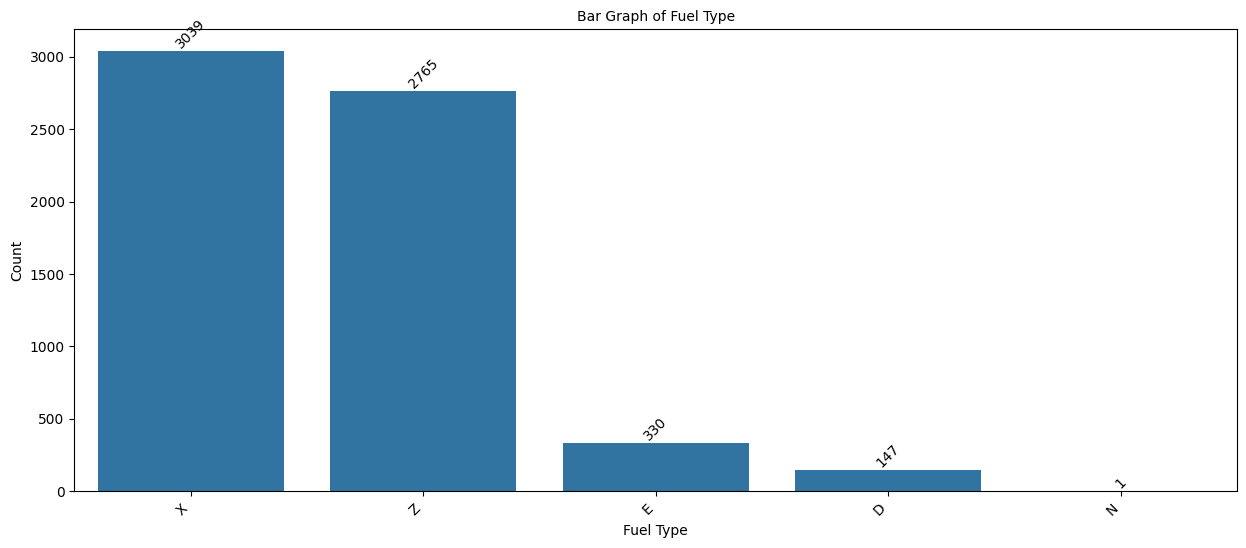

In [ ]:
def plot_bar_graphs(co2, columns):
    for column in columns:
        plt.figure(figsize=(15, 6))
        ax = sns.countplot(x=column, data=co2, order=co2[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.title(f'Bar Graph of {column}', fontsize=10)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.show()
        print("\n")

cat_features = ['Make','Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',]

plot_bar_graphs(co2, cat_features)

<ipython-input-132-3810463502ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2.loc[:, 'Is_hybrid'] = filtered_co2['Model'].apply(lambda x: 'Hybrid' if 'hybrid' in x.lower() else 'Non-Hybrid')


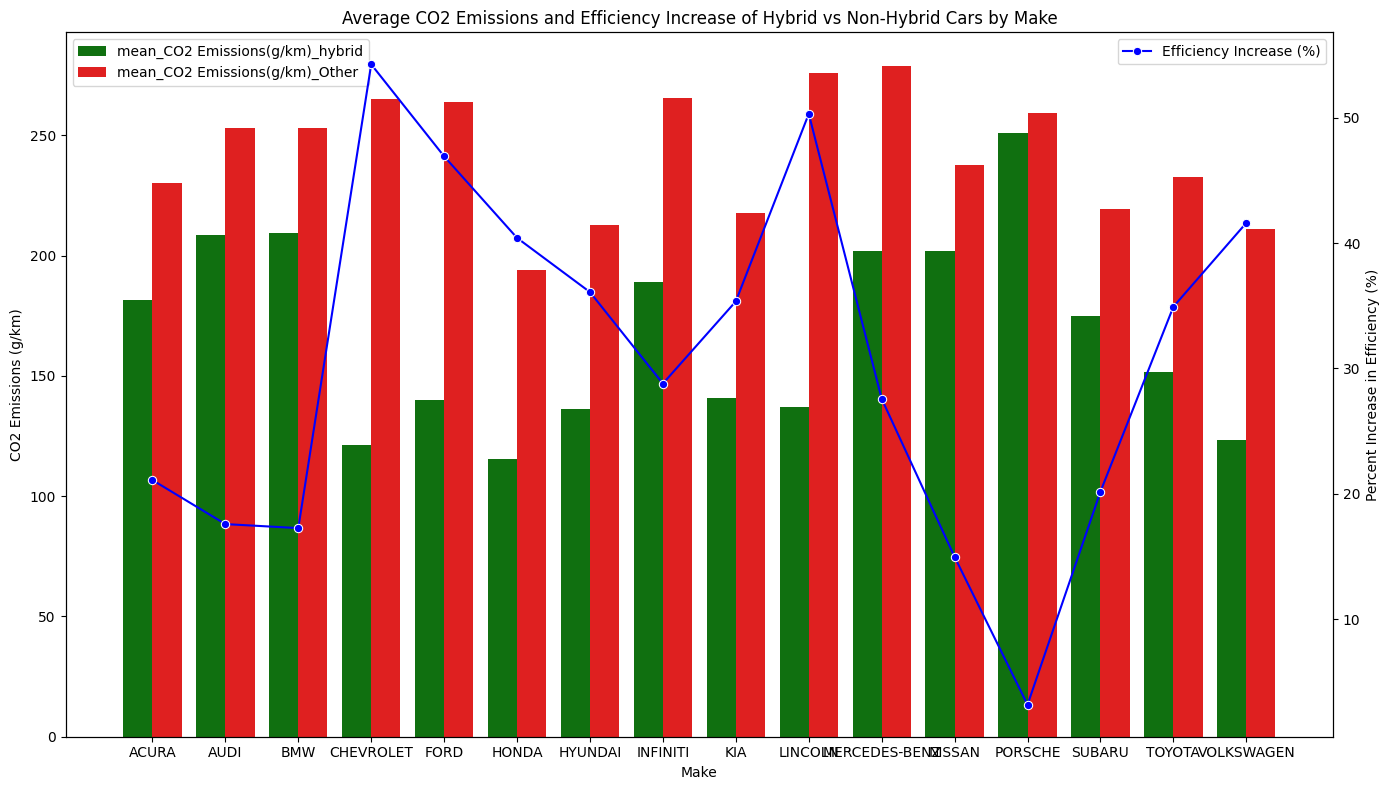

In [ ]:
hybrid_makes = co2[co2['Model'].str.contains('hybrid', case=False, na=False)]['Make'].unique()

filtered_co2 = co2[co2['Make'].isin(hybrid_makes)]

filtered_co2.loc[:, 'Is_hybrid'] = filtered_co2['Model'].apply(lambda x: 'Hybrid' if 'hybrid' in x.lower() else 'Non-Hybrid')

avg_co2_emissions = filtered_co2.groupby(['Make', 'Is_hybrid'])['CO2 Emissions(g/km)'].mean().reset_index()

avg_co2_emissions.rename(columns={'CO2 Emissions(g/km)': 'mean_CO2 Emissions(g/km)'}, inplace=True)

avg_co2_emissions = filtered_co2.groupby(['Make', 'Is_hybrid'])['CO2 Emissions(g/km)'].mean().reset_index()

avg_co2_emissions.rename(columns={'CO2 Emissions(g/km)': 'mean_CO2 Emissions(g/km)'}, inplace=True)

pivot_co2_emissions = avg_co2_emissions.pivot(index='Make', columns='Is_hybrid', values='mean_CO2 Emissions(g/km)')

pivot_co2_emissions.rename(columns={'Hybrid': 'mean_CO2 Emissions(g/km)_hybrid',
                                    'Non-Hybrid': 'mean_CO2 Emissions(g/km)_Other'}, inplace=True)

pivot_co2_emissions['Percent_Increase_in_Efficiency'] = (
    (pivot_co2_emissions['mean_CO2 Emissions(g/km)_Other'] - pivot_co2_emissions['mean_CO2 Emissions(g/km)_hybrid']) /
    pivot_co2_emissions['mean_CO2 Emissions(g/km)_Other'] * 100
)

pivot_co2_emissions.reset_index(inplace=True)

plt.figure(figsize=(14, 8))

melted_co2_emissions = pd.melt(pivot_co2_emissions, id_vars='Make',
                               value_vars=['mean_CO2 Emissions(g/km)_hybrid', 'mean_CO2 Emissions(g/km)_Other'],
                               var_name='Type', value_name='CO2 Emissions(g/km)')

ax = sns.barplot(x='Make', y='CO2 Emissions(g/km)', hue='Type', data=melted_co2_emissions,
                 palette={'mean_CO2 Emissions(g/km)_hybrid': 'green', 'mean_CO2 Emissions(g/km)_Other': 'red'})

ax2 = ax.twinx()
ax2 = sns.lineplot(x='Make', y='Percent_Increase_in_Efficiency', data=pivot_co2_emissions,
                   color='blue', marker='o', label='Efficiency Increase (%)')

ax.set_ylabel('CO2 Emissions (g/km)')
ax2.set_ylabel('Percent Increase in Efficiency (%)')
plt.title('Average CO2 Emissions and Efficiency Increase of Hybrid vs Non-Hybrid Cars by Make')

plt.xticks(rotation=90)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
#Identify the Number of outliers
co2_num_features=co2.select_dtypes(include=np.number)
Q1 = co2_num_features.quantile(0.25)
Q3 = co2_num_features.quantile(0.75)
IQR = Q3 - Q1

outlier = pd.DataFrame((co2_num_features < (Q1 - 1.5 * IQR)) | (co2_num_features > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine Size(L) are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel Consumption City (L/100 km) are 116
Total number of Outliers in column Fuel Consumption Hwy (L/100 km) are 150
Total number of Outliers in column Fuel Consumption Comb (L/100 km) are 115
Total number of Outliers in column Fuel Consumption Comb (mpg) are 95
Total number of Outliers in column CO2 Emissions(g/km) are 74


In [ ]:
# Function to remove outliers based on the IQR method
def remove_outliers_iqr(co2, columns):
    Q1 = co2[columns].quantile(0.25)
    Q3 = co2[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Removing outliers
    co2_clean = co2[~((co2[columns] < (Q1 - 1.5 * IQR)) | (co2[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return co2_clean

# Define the numeric columns to check for outliers
numeric_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                   'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Remove outliers from the dataset
co2_cleaned = remove_outliers_iqr(co2, numeric_columns)

# Display the shape of the cleaned dataset
co2_cleaned.shape

(5911, 12)

Lets see if we can drop any categorical features.

In [ ]:
anova = {}
categorical = co2.select_dtypes(include=['object']).columns

for feature in categorical:
    groups = [co2["CO2 Emissions(g/km)"][co2[feature] == category].values for category in co2[feature].unique()]
    anova[feature] = stats.f_oneway(*groups)

for feature, result in anova.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()

ANOVA result for Make:
F-statistic: 89.8328089030727, p-value: 0.0

ANOVA result for Model:
F-statistic: 46.262763395960114, p-value: 0.0

ANOVA result for Vehicle Class:
F-statistic: 236.35690130495647, p-value: 0.0

ANOVA result for Transmission:
F-statistic: 85.6763988633073, p-value: 0.0

ANOVA result for Fuel Type:
F-statistic: 116.89078468083586, p-value: 2.5886730827304667e-96



All of these categorical features are statistically significant, so cannot drop any of them. Let's see the correlation of numerical features with the outcome.

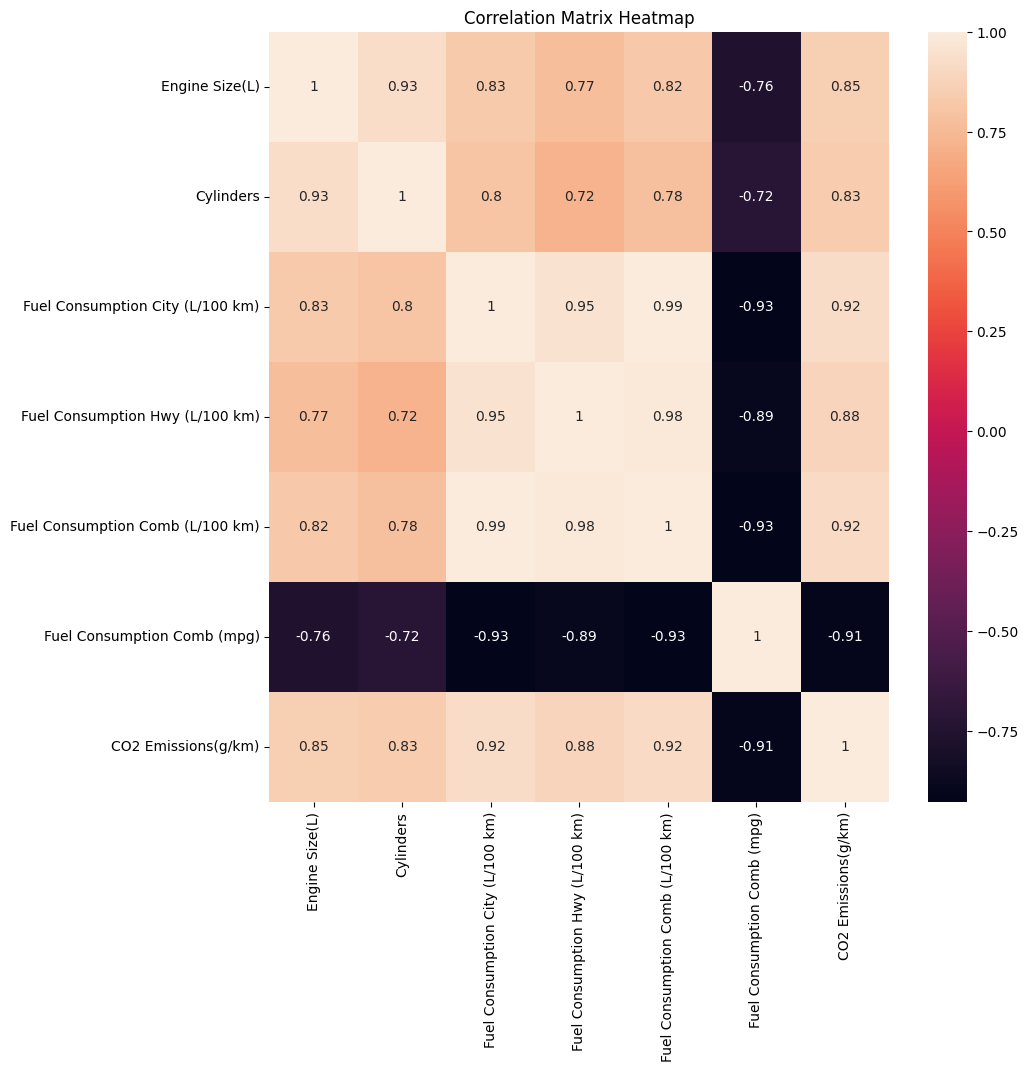

In [ ]:
correlation_matrix = co2.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Again, all the features are highly correlated with the target variable. Interestingly, the Fuel Cosumptions are very correlated and we could just drop Hwy and City in favour of the combined consumption. Maybe later we can make use of those rows to improve accuracy.

In [ ]:
co2=co2.drop("Fuel Consumption City (L/100 km)",axis=1)
co2=co2.drop("Fuel Consumption Hwy (L/100 km)",axis=1)
co2=co2.drop("Fuel Consumption Comb (mpg)", axis=1)

#co2.head(5)

for column in co2.columns:
    unique_values = co2[column].value_counts().reset_index()
    unique_values.columns = [column, 'Count']
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'Make':
             Make  Count
0            FORD    577
1       CHEVROLET    515
2             BMW    501
3   MERCEDES-BENZ    365
4         PORSCHE    296
5             GMC    289
6          TOYOTA    276
7            AUDI    263
8          NISSAN    213
9            MINI    200
10           JEEP    200
11            KIA    192
12     VOLKSWAGEN    187
13        HYUNDAI    184
14          DODGE    180
15          HONDA    164
16       CADILLAC    141
17          LEXUS    129
18          MAZDA    127
19         SUBARU    119
20         JAGUAR    118
21          VOLVO    118
22          BUICK     92
23       INFINITI     87
24        LINCOLN     81
25     LAND ROVER     76
26     MITSUBISHI     73
27            RAM     72
28       CHRYSLER     64
29           FIAT     56
30       MASERATI     52
31          ACURA     51
32    ROLLS-ROYCE     48
33   ASTON MARTIN     39
34    LAMBORGHINI     37
35        BENTLEY     35
36          SCION     21
37     ALFA ROMEO     19

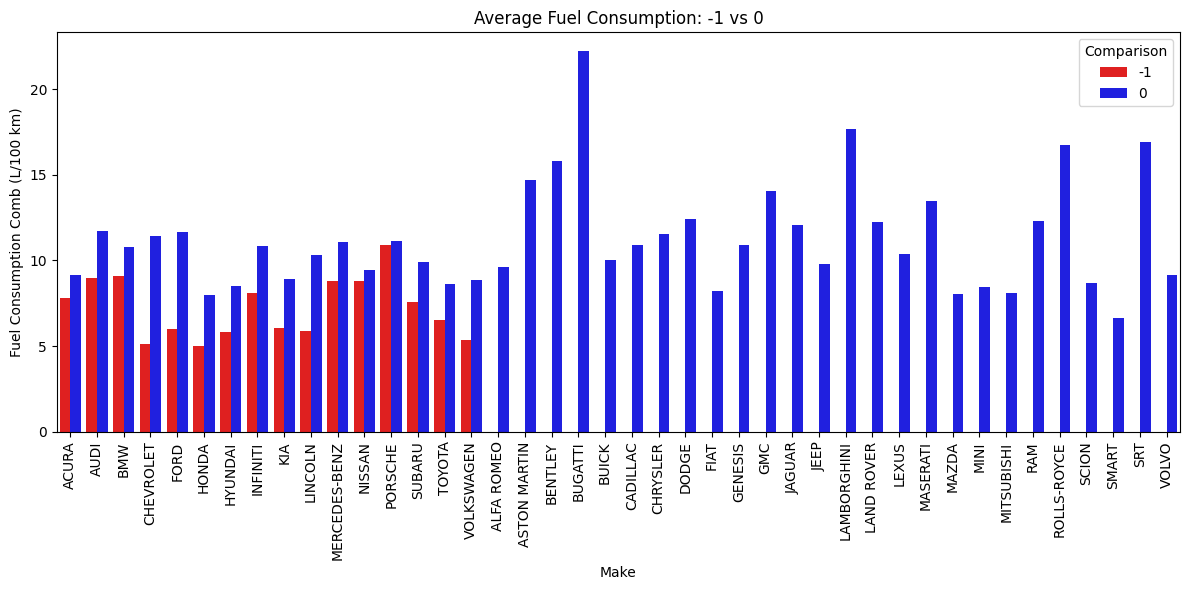

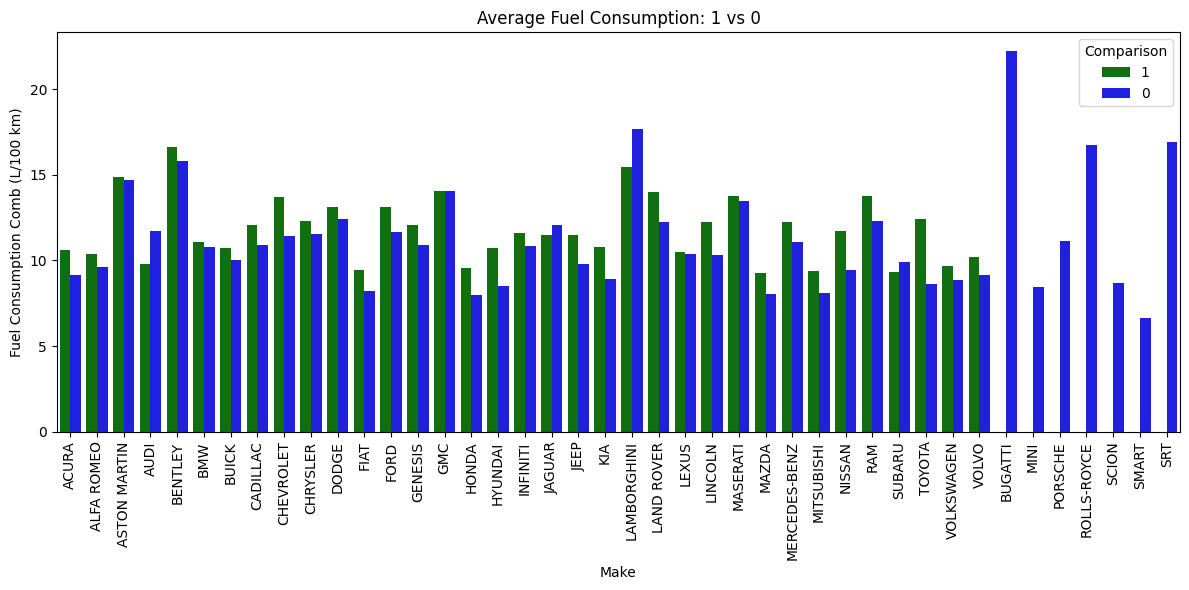

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample arrays of keywords for classification
hybrid_keywords = ['hybrid', 'plugin', 'electric']
four_wheel_keywords = ['AWD', '4WD', 'QUATTRO', 'V8', 'V12', 'SH-AWD', '4X4', '4MATIC', '4MOTION', 'GRAN','SPORT', 'AMG']

def classify_model(model):
    model_lower = model.lower() if pd.notna(model) else ""
    if any(keyword.lower() in model_lower for keyword in hybrid_keywords):
        return -1
    elif any(keyword.lower() in model_lower for keyword in four_wheel_keywords):
        return 1  # Classify as 1 for four-wheel drive keywords
    else:
        return 0

# Apply the classification function to create the 'Model_consumption' column
co2['Model_consumption'] = co2['Model'].apply(classify_model)

# Group by 'Make' and 'Model_consumption' to calculate average fuel consumption
avg_fuel_consumption = co2.groupby(['Make', 'Model_consumption'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

# Separate data for -1, 0, and 1 features
feature_minus1 = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == -1]
feature_zero = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == 0]
feature_one = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == 1]
# Plotting average fuel consumption for models marked -1 vs 0
comparison_minus1_zero = pd.concat([feature_minus1.assign(Comparison='-1'),
                                     feature_zero.assign(Comparison='0')])
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Fuel Consumption Comb (L/100 km)', hue='Comparison', data=comparison_minus1_zero, palette=['red', 'blue'])
plt.xticks(rotation=90)
plt.title('Average Fuel Consumption: -1 vs 0')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.tight_layout()
plt.show()

# Plotting average fuel consumption for models marked 1 vs 0
comparison_one_zero = pd.concat([feature_one.assign(Comparison='1'),
                                  feature_zero.assign(Comparison='0')])
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Fuel Consumption Comb (L/100 km)', hue='Comparison', data=comparison_one_zero, palette=['green', 'blue'])
plt.xticks(rotation=90)
plt.title('Average Fuel Consumption: 1 vs 0')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.tight_layout()
plt.show()


New feature extracted from model.
1 means the model will consume higher fuel than counterpart as model name sugests. -1 will suggest a model with lower fuel consumption as it will be hybrid and 0 for standard models.

In [ ]:
import re
import pandas as pd
from collections import Counter
from itertools import combinations

# Define the specific words to ignore
ignore_words = ['AWD', '4WD', 'QUATTRO', 'V8', 'V12', 'XDRIVE', 'COUPE', 'PKG', 'SH-AWD', "COOPER",
                'CABRIOLET', 'FFV', '4X4', 'HYBRID', 'CONVERTIBLE', '4MATIC', 'A-SPEC', 'TDI', '4MOTION', 'ALLROAD', 'MODIFIED', 'GRAN', 'SEDAN', 'SPORT', '5-DOOR', '4-DOOR', 'AMG']



# Function to clean and filter out invalid words, but include numbers like '911'
def clean_word(word):
    cleaned_word = re.sub(r'[^a-zA-Z0-9-]', '', word)  # Keep letters, numbers, and dashes
    if (len(cleaned_word) >= 2 and
            cleaned_word.upper() not in ignore_words and
            re.search(r'[a-zA-Z0-9]', cleaned_word)):  # Ensure at least one letter or number
        return cleaned_word.upper()
    return None

# Function to find the most common substrings in the model names
def find_most_common_words_per_make(df):
    result = {}
    makes = df['Make'].unique()

    for make in makes:
        make_models = df[df['Make'] == make]['Model']
        all_words = []
        for model in make_models:
            words = model.split()  # Split by spaces
            cleaned_words = [clean_word(word) for word in words if clean_word(word)]
            all_words.extend(cleaned_words)

        # Count common words
        common_words = Counter(all_words).most_common()
        if common_words:
            result[make] = common_words

    return result

# Function to replace the model names with the most common word(s)
def replace_models_with_most_common(df, common_words_per_make):
    updated_models = []

    for index, row in df.iterrows():
        make = row['Make']
        model = row['Model']
        words = model.split()
        cleaned_words = [clean_word(word) for word in words if clean_word(word)]

        if make in common_words_per_make:
            # Get the most common words in order of frequency
            common_words =  common_words_per_make[make]

            # Check for the highest-ranked common word in the model's cleaned words
            max_clean_freq = 0
            highest_ranked_word = None
            for clean_model_word in cleaned_words:
                for word, freq in common_words:
                  if clean_model_word == word:
                    if freq > max_clean_freq:
                      highest_ranked_word = word
                      max_clean_freq = freq

            # Replace with the highest-ranked word found; else keep original model
            if highest_ranked_word:
                updated_models.append(highest_ranked_word)
            else:
                updated_models.append(model)  # Leave the model unchanged if no common words

        else:
            updated_models.append(model)  # Leave the model unchanged if make not in common words

    df['Model'] = updated_models  # Add the updated models to the DataFrame
    return df

# Step 1: Find common words per make
common_words_per_make = find_most_common_words_per_make(co2)

# Step 2: Replace models with the most common word(s)
co2 = replace_models_with_most_common(co2, common_words_per_make)

Reduced the number of unique model name from around 2700 to 450. The model specification dropped is used to extract 'Model_consumption' feature

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption'],
      dtype='object')

In [ ]:
# Converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(categorical)
for column in categorical:
    co2[column] = label_encoder.fit_transform(co2[column])
print(co2)

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')
      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0    193              0             2.0          4            14   
1        0    193              0             2.4          4            25   
2        0    193              0             1.5          4            22   
3        0    238             11             3.5          6            15   
4        0    297             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41    345             11             2.0          4            17   
7381    41    345             11             2.0          4            17   
7382    41    346             11             2.0          4            17   
7383    41    345             12             2.0          4            17   
7384    41    346             12             2.0          4       

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption'],
      dtype='object')

Should be enough visualisation and preprocessing for now, plugging models in.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Clustering with k-means for data processing

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant features for clustering
co2knn = co2.copy()
features = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Cylinders']
X_clustering = co2knn[features].dropna()  # Drop rows with missing values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
co2knn['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the new dataset with the Cluster column
print("\nDataset with Cluster labels:")
print(co2knn.head())



Dataset with Cluster labels:
   Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0    193              0             2.0          4            14   
1     0    193              0             2.4          4            25   
2     0    193              0             1.5          4            22   
3     0    238             11             3.5          6            15   
4     0    297             11             3.5          6            15   

   Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
0          4                               8.5                  196   
1          4                               9.6                  221   
2          4                               5.9                  136   
3          4                              11.1                  255   
4          4                              10.6                  244   

   Model_consumption  Cluster  
0                  0        0  
1                  0        0  
2 

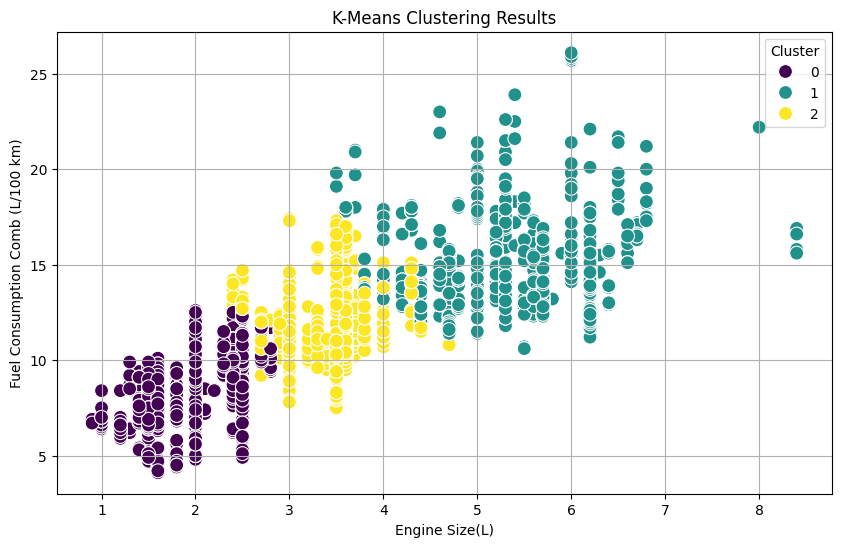

In [ ]:
# Visualize the clustering results)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_clustering.iloc[:, 0], y=X_clustering.iloc[:, 1],
    hue=co2knn['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Now we will start with db scan


DBSCAN Cluster Labels:
[-1  0  1  2  3  4  5  6  7  8]


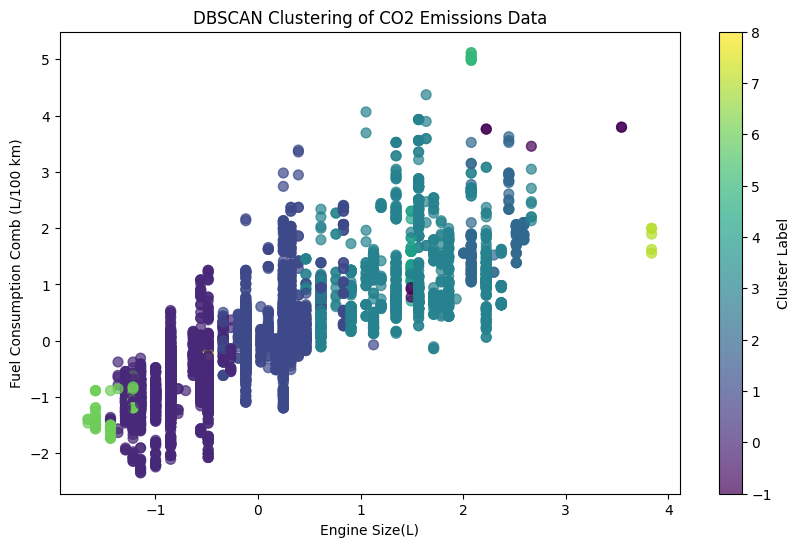


Dataset with DBSCAN Cluster labels:
   Engine Size(L)  Fuel Consumption Comb (L/100 km)  Cylinders  DBSCAN_Cluster
0             2.0                               8.5          4               0
1             2.4                               9.6          4               0
2             1.5                               5.9          4               0
3             3.5                              11.1          6               1
4             3.5                              10.6          6               1


In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
co2db = co2.copy()
X_scaled = scaler.fit_transform(co2db[features])
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust hyperparameters as needed
co2db['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Check cluster assignments
print("DBSCAN Cluster Labels:")
print(np.unique(co2db['DBSCAN_Cluster']))

# Visualize the clusters (2D plot)
# Using the first two features for simplicity
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('DBSCAN Clustering of CO2 Emissions Data')
plt.xlabel(features[0])  # 'Engine Size(L)'
plt.ylabel(features[1])  # 'Fuel Consumption Comb (L/100 km)'
plt.show()

# Add cluster labels to dataset
print("\nDataset with DBSCAN Cluster labels:")
print(co2db[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Cylinders', 'DBSCAN_Cluster']].head())

Starting models


In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [ ]:
#Linear regression
def LinearRegressionDef(X_train, X_test, y_train, y_test):
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    y_train_pred = linear_reg.predict(X_train)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")
    linear_reg.score(X_test,y_test)
    lr_score = train_val(y_train, y_train_pred, y_test, y_pred, "linear_regression")
    return lr_score

In [ ]:
#Ridge
def RidgeDef(X_train, X_test, y_train, y_test):
    ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
    ridge_reg.fit(X_train, y_train)

    y_pred = ridge_reg.predict(X_test)
    y_train_pred = ridge_reg.predict(X_train)
    rls = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_reg")
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

    ridge_score = ridge_reg.score(X_test, y_test)
    print(f"Ridge model score: {ridge_score:.4f}")
    return rls


In [ ]:
#Lasso
def LassoDef(X_train, X_test, y_train, y_test):
    lasso_reg = Lasso(alpha=1.0)  # You can adjust alpha for regularization strength
    lasso_reg.fit(X_train, y_train)

    y_pred = lasso_reg.predict(X_test)
    y_train_pred = lasso_reg.predict(X_train)
    lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_reg")


    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

    lasso_score = lasso_reg.score(X_test, y_test)
    print(f"Lasso model score: {lasso_score:.4f}")
    return lcs


In [ ]:
#KNN
def KNNDef(X_train, X_test, y_train, y_test):
    knn = KNeighborsRegressor()  # You can adjust n_neighbors as needed
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    kns = train_val(y_train, y_train_pred, y_test, y_pred, "knn")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    return kns;



In [ ]:
#SVM
def SVMDef(X_train, X_test, y_train, y_test):
    svr = SVR(kernel='linear')

    svr.fit(X_train, y_train)

    y_pred = svr.predict(X_test)
    y_train_pred = svr.predict(X_train)
    svs = train_val(y_train, y_train_pred, y_test, y_pred, "svr")
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R-squared: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    return svs


In [ ]:
#Decision Tree
def DecisionTreeDef(X_train, X_test, y_train, y_test):
    decision_tree = DecisionTreeRegressor(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    y_train_pred = decision_tree.predict(X_train)
    dts = train_val(y_train, y_train_pred, y_test, y_pred, "decision_tree")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Check the height of the tree
    tree_height = decision_tree.get_depth()
    print(f"Decision Tree Height: {tree_height}")
    return dts

In [ ]:
# Random Forest
def RandomForestDef(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_train_pred = rf.predict(X_train)
    rfs = train_val(y_train, y_train_pred, y_test, y_pred, "rf")
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    return rfs


In [ ]:
# bagging should be followed after executing decsion tree cell .
def baggingDef(X_train, X_test, y_train, y_test):
    decision_tree = DecisionTreeRegressor(random_state=42)
    bagging_model = BaggingRegressor(estimator=decision_tree, n_estimators=100, random_state=42)

    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    y_train_pred = bagging_model.predict(X_train)
    bdt = train_val(y_train, y_train_pred, y_test, y_pred, "bagging")
    # Evaluate
    bagging_score = bagging_model.score(X_test, y_test)
    print(f"Bagging Model R^2 Score: {bagging_score}")
    return bdt

In [ ]:
#xgboost
def xgboostDef(X_train, X_test, y_train, y_test):
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)
    rxs = train_val(y_train, y_train_pred, y_test, y_pred, "xgb")
    # Evaluate
    xgb_score = xgb_model.score(X_test, y_test)
    print(f"XGBoost Model R^2 Score: {xgb_score}")
    return rxs


In [ ]:
X = co2.drop('CO2 Emissions(g/km)', axis=1)
y = co2['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(co2.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption'],
      dtype='object')


In [ ]:
# // knn
X = co2knn.drop('CO2 Emissions(g/km)', axis=1)
y = co2knn['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(co2knn.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption', 'Cluster'],
      dtype='object')


In [ ]:
# // dbscan
X = co2db.drop('CO2 Emissions(g/km)', axis=1)
y = co2db['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(co2db.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption', 'DBSCAN_Cluster'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
lr_score = LinearRegressionDef(X_train, X_test, y_train, y_test)
from sklearn.linear_model import Ridge
rls = RidgeDef(X_train, X_test, y_train, y_test)
from sklearn.linear_model import Lasso
lcs = LassoDef(X_train, X_test, y_train, y_test)
from sklearn.neighbors import KNeighborsRegressor
kns = KNNDef(X_train, X_test, y_train, y_test)
# from sklearn.svm import SVR
# svs = SVMDef(X_train, X_test, y_train, y_test)
from sklearn.tree import DecisionTreeRegressor
dts = DecisionTreeDef(X_train, X_test, y_train, y_test)
from sklearn.ensemble import RandomForestRegressor
rfs = RandomForestDef(X_train, X_test, y_train, y_test)
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bdt = baggingDef(X_train, X_test, y_train, y_test)
import xgboost as xgb
rxs = xgboostDef(X_train, X_test, y_train, y_test)

Mean Squared Error: 352.8539
R-squared: 0.9026
Mean Squared Error: 352.8340
R-squared: 0.9026
Ridge model score: 0.9026
Mean Squared Error: 355.4236
R-squared: 0.9018
Lasso model score: 0.9018
Mean Squared Error: 317.3781
R-squared: 0.9123
Mean Squared Error: 14.4665
R-squared: 0.9960
Decision Tree Height: 22
R-squared: 0.9968
Mean Squared Error: 11.4857
Bagging Model R^2 Score: 0.9968608018076145
XGBoost Model R^2 Score: 0.997136116027832


# Probably enough models.

We now have a working pipeline and the DT and RF models already seem almost perfect. (Gonna be hard to show improvement later because theres no missing values even)

We could do scaling, outlier detection, better preprocessing (using the Hwy and City better maybe) but idk how much it'll change the results for later

Could do some hypothesis testing on types of fuel etc maybe.

Feel free to suggest stuff...

In [ ]:
# pd.concat([lr_score,rls,lcs,kns,svs,dts,rfs,bdt,rxs], axis=1)
# without svm
pd.concat([lr_score,rls,lcs,kns,dts,rfs,bdt,rxs], axis=1)

,linear_regression_train,linear_regression_test,ridge_reg_train,ridge_reg_test,lasso_reg_train,lasso_reg_test,knn_train,knn_test,decision_tree_train,decision_tree_test,rf_train,rf_test,bagging_train,bagging_test,xgb_train,xgb_test
R2,0.908919,0.902011,0.908919,0.902017,0.907145,0.901841,0.944543,0.908930,0.999580,0.995975,0.999103,0.996925,0.999076,0.996833,0.998647,0.997148
mae,12.038900,12.907724,12.038940,12.907591,12.067748,12.831630,8.350375,11.271618,0.539425,2.314934,1.056480,2.257760,1.056774,2.264143,1.692911,2.164844
mse,315.765892,354.807257,315.765917,354.786283,321.918512,355.422902,192.263716,329.754674,1.455601,14.572977,3.111025,11.133211,3.202190,11.466601,4.690640,10.325632
rmse,17.769803,18.836328,17.769804,18.835771,17.942088,18.852663,13.865919,18.159148,1.206483,3.817457,1.763810,3.336647,1.789466,3.386237,2.165789,3.213352


In [ ]:
# without svm and with knn
pd.concat([lr_score,rls,lcs,kns,dts,rfs,bdt,rxs], axis=1)

,linear_regression_train,linear_regression_test,ridge_reg_train,ridge_reg_test,lasso_reg_train,lasso_reg_test,knn_train,knn_test,decision_tree_train,decision_tree_test,rf_train,rf_test,bagging_train,bagging_test,xgb_train,xgb_test
R2,0.909131,0.901955,0.909131,0.901961,0.907145,0.901841,0.944838,0.907253,0.999580,0.995923,0.999053,0.996896,0.999054,0.996899,0.998647,0.997125
mae,12.044013,12.920051,12.044087,12.919847,12.067748,12.831629,8.304253,11.354801,0.539425,2.339054,1.056290,2.264219,1.056008,2.256855,1.690094,2.169077
mse,315.030769,355.009831,315.030794,354.988806,321.918585,355.422992,191.239054,335.827586,1.455601,14.761930,3.282858,11.240097,3.280326,11.227955,4.692232,10.409580
rmse,17.749106,18.841705,17.749107,18.841147,17.942090,18.852665,13.828921,18.325599,1.206483,3.842126,1.811866,3.352625,1.811167,3.350814,2.166156,3.226388


In [ ]:
# without svm and with dbscan
pd.concat([lr_score,rls,lcs,kns,dts,rfs,bdt,rxs], axis=1)

,linear_regression_train,linear_regression_test,ridge_reg_train,ridge_reg_test,lasso_reg_train,lasso_reg_test,knn_train,knn_test,decision_tree_train,decision_tree_test,rf_train,rf_test,bagging_train,bagging_test,xgb_train,xgb_test
R2,0.909338,0.902551,0.909338,0.902556,0.907145,0.901841,0.946244,0.912348,0.999580,0.996005,0.999062,0.996828,0.999091,0.996861,0.998634,0.997136
mae,12.038666,12.873737,12.038636,12.873591,12.067745,12.831622,8.323175,11.184509,0.539425,2.315199,1.055739,2.265927,1.052527,2.256287,1.696594,2.165981
mse,314.314981,352.853916,314.315008,352.833953,321.919010,355.423614,186.366423,317.378122,1.455601,14.466545,3.251866,11.485677,3.152974,11.366736,4.737276,10.369948
rmse,17.728931,18.784406,17.728931,18.783875,17.942102,18.852682,13.651609,17.815109,1.206483,3.803491,1.803293,3.389053,1.775662,3.371459,2.176528,3.220240
